In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

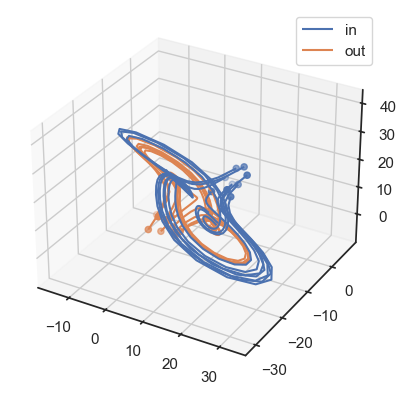

In [6]:
from dynadojo.systems.lorenz import LorenzSystem
from dynadojo.wrappers import SystemChecker
from dynadojo.utils.lds import plot

latent_dim = 3
embed_dim = 3
n = 10
timesteps = 50
system = SystemChecker(LorenzSystem(latent_dim, embed_dim, noise_scale=0, seed=1912))
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(n, in_dist=False)
x = system.make_data(x0, timesteps=timesteps)
y = system.make_data(y0, timesteps=timesteps, noisy=True)
plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

/Users/logan/PycharmProjects/dynadojo/venv/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/logan/PycharmProjects/dynadojo/venv/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/logan/PycharmProjects/dynadojo/venv/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/logan/PycharmProjects/dynadojo/venv/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (

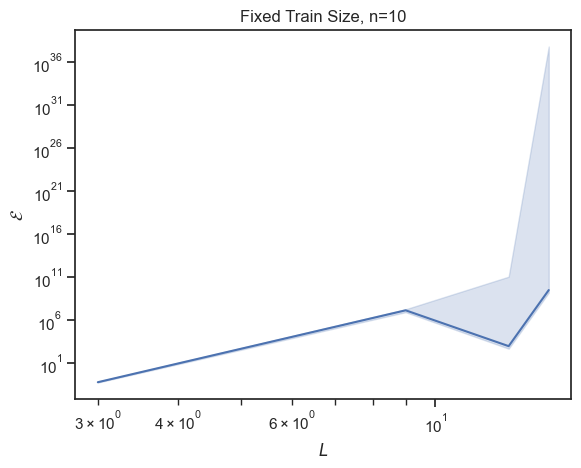

<Axes: title={'center': 'Fixed Train Size, n=10'}, xlabel='$L$', ylabel='$\\mathcal{E}$'>

In [14]:
from dynadojo.challenges import FixedTrainSize
from dynadojo.baselines.sindy import SINDy
challenge = FixedTrainSize(L=[3, 9, 13, 15], E=None, t=50, n=10, reps=3, system_cls=LorenzSystem, test_examples=1, test_timesteps=50)
data = challenge.evaluate(algo_cls=SINDy)
challenge.plot(data)